<a href="https://colab.research.google.com/github/axiom19/Pong_game/blob/main/Raw_ElasticNet_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Raw elastic 

In [ ]:
# Importing statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
pip install progressbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=49eb662c0b834f2ae2b31d6333eb1aa01801fd5e470bb8ed98ba0f390ffef88f
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar


In [ ]:
# Creating pandas dataframe from csv datasheet
data = pd.read_csv("/content/Credit_N400_p9.csv")

FileNotFoundError: ignored

In [ ]:
data.shape

(400, 10)

In [ ]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [ ]:
data.tail()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
395,12.096,4100,307,3,32,13,Male,No,Yes,560
396,13.364,3838,296,5,65,17,Male,No,No,480
397,57.872,4171,321,5,67,12,Female,No,Yes,138
398,37.728,2525,192,1,44,13,Male,No,Yes,0
399,18.701,5524,415,5,64,7,Female,No,No,966


In [ ]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [ ]:
data["Limit"].mean()

4735.6

In [ ]:
columns = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]
from numpy.core.fromnumeric import std
for features in columns:
  mean = data[features].mean()
  std_dev = data[features].std()
  # Centralising the data
  for observations in range(data.shape[0]):  
    data[features][observations] = (data[features][observations] - mean)
    #Standardizing the data
    if features == "Balance":
      pass
    else:
      data[features][observations] = data[features][observations] / std_dev
    # data[features][observations] = "{:.2f}".format(data[features][observations])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
data.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-8.881784e-18,0.050000,0.040000,0.177500,0.007500,-0.062500,-0.452500
std,1.000000e+00,0.699086,0.727822,0.516392,0.627238,0.509158,459.333922
min,-9.892355e-01,-1.000000,-1.000000,0.000000,-1.000000,-2.000000,-520.000000
25%,-6.869665e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-451.250000
50%,-3.434142e-01,0.000000,0.000000,0.000000,0.000000,0.000000,-60.500000
75%,3.476271e-01,0.000000,0.000000,0.000000,0.000000,0.000000,342.000000
max,4.012428e+00,3.000000,4.000000,4.000000,2.000000,1.000000,1478.000000


In [ ]:
data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,-0.860505,0,0,0,-1,0,Male,No,Yes,-187
1,1.725276,0,0,0,1,0,Female,Yes,Yes,382
2,1.684646,1,1,0,0,0,Male,No,No,59
3,2.942467,2,2,0,-1,0,Female,No,No,443
4,0.302549,0,0,0,0,0,Male,No,Yes,-189


In [ ]:
# Creating X and y from the dataframe
X = data.loc[:,["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]]
Y = data.loc[:,["Balance"]]

In [ ]:
print(X.shape)
print(Y.shape)

(400, 9)
(400, 1)


In [ ]:
X["Gender"][0]    

'Male'

In [ ]:
# Converting qualitative data in Binary

qual_feature = ["Gender"]
for features in qual_feature:
  for observations in range(X.shape[0]):
    if X[features][observations] == "Male":  
      X[features][observations] = 1
    else:
      X[features][observations] = 0

qual_feature = ["Student","Married"]
for features in qual_feature:
  for observations in range(X.shape[0]):
    if X[features][observations] == "Yes":  
      X[features][observations] = 1
    else:
      X[features][observations] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Setting

In [ ]:
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,-0.860505,0,0,0,-1,0,1,0,1
1,1.725276,0,0,0,1,0,0,1,1
2,1.684646,1,1,0,0,0,1,0,0
3,2.942467,2,2,0,-1,0,0,0,0
4,0.302549,0,0,0,0,0,1,0,1


In [ ]:
tuning_params = [10**i for i in range(-2,7)]
alphas = [i/5 for i in range(0,6)]

In [ ]:
X.index

RangeIndex(start=0, stop=400, step=1)

In [ ]:
def feature_sq(X_data, feature):
  sq_list = []
  for rows in (X_data.index):
    sq = X_data[feature][rows] ** 2
    sq_list.append(sq)
  sq_sum = np.sum(sq_list)
  return sq_sum

In [ ]:
features = ["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]

In [ ]:
X_mat = X.to_numpy()
Y_mat = Y.to_numpy()

In [ ]:
import random 
betas = [random.uniform(-1.0,1.0) for i in range(9)]
betas = np.array(betas)
betas_ = np.expand_dims(betas, axis=1)

In [ ]:
b_k = []
for column in features:
  b_k.append(feature_sq(X,column))

In [ ]:
b_k

[399.0, 196, 212, 119, 157, 105, 193, 40, 245]

In [ ]:
def pos_func(value):
  if value >= 0:
    return value
  else:
    value = 0
    return value

In [ ]:
betas_[0] = 0.1

In [ ]:
print(betas_)

[[ 0.1       ]
 [ 0.61228508]
 [ 0.29136189]
 [-0.58885958]
 [-0.96886612]
 [-0.41261376]
 [-0.01460978]
 [ 0.9378581 ]
 [-0.3039116 ]]


In [ ]:
def elastic_net(lamda,alpha):
  iterations = 0
  while iterations != 1000:
    i=0
    for feature in features:
      x_ = X[feature]
      x_ = np.array(x_)
      x_k = np.expand_dims(x_, axis=1)
      x_k_transpose = np.transpose(x_k)
      a_k_dum = np.dot(x_k_transpose,(Y_mat - np.dot(X_mat, betas_) + np.dot(x_k, betas_[i][0])))
      a_k = a_k_dum.item()
      inner_part = np.fabs(a_k) - (lamda*(1-alpha))/2
      beta_k = (np.sign(a_k)*(pos_func(inner_part)))/(b_k[i] + (lamda * alpha))
      betas_[i] = beta_k
      i+=1
    iterations +=1
  return betas_

In [ ]:
per_alpha_list = []
for alpha in alphas:
  per_lamda_list = []
  for lamdas in tuning_params:
    new_betas = elastic_net(lamda=lamdas, alpha=alpha)
    # print(new_betas)
    per_lamda_list.append(new_betas.reshape(9,).tolist())
  per_alpha_list.append(per_lamda_list)

In [ ]:
import math
log_tuning = [str(math.log10(i)) for i in tuning_params] 

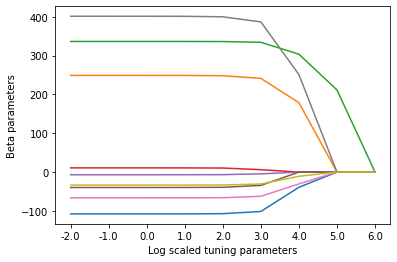

In [ ]:
plt.plot(log_tuning, per_alpha_list[0])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
# plt.legend(features)
plt.show()

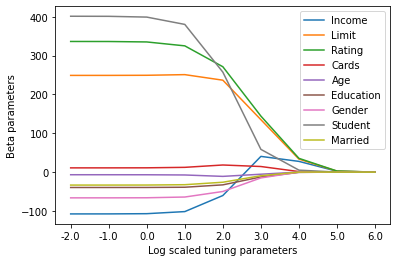

In [ ]:
plt.plot(log_tuning, per_alpha_list[1])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
plt.legend(features)
plt.show()

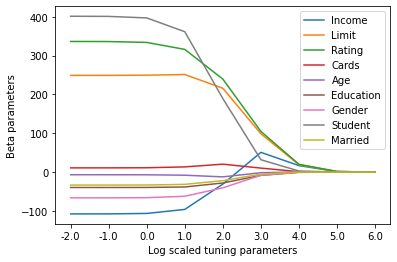

In [ ]:
plt.plot(log_tuning, per_alpha_list[2])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
plt.legend(features)
plt.show()


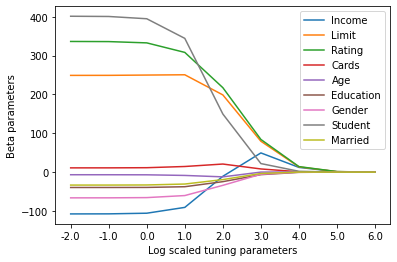

In [ ]:
plt.plot(log_tuning, per_alpha_list[3])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
plt.legend(features)
plt.show()

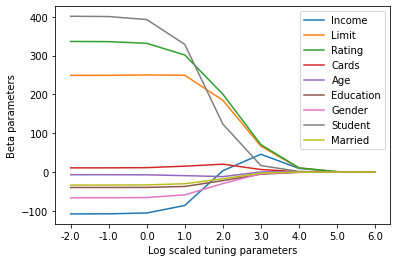

In [ ]:
plt.plot(log_tuning, per_alpha_list[4])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
plt.legend(features)
plt.show()

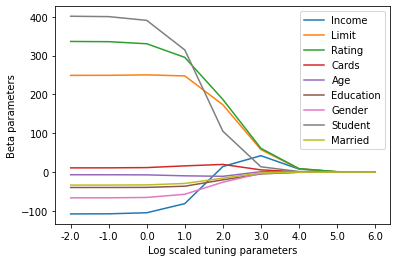

In [ ]:
plt.plot(log_tuning, per_alpha_list[5])
plt.xlabel("Log scaled tuning parameters")
plt.ylabel("Beta parameters")
plt.legend(features)
plt.show()

Part 2

In [ ]:
# Creating pandas dataframe from csv datasheet
cv_df = pd.read_csv("/content/Credit_N400_p9.csv")

In [ ]:
print(cv_df.shape)
cv_df.head()

(400, 10)


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [ ]:
import random
index_list = [i for i in range(400)]
random.shuffle(index_list)

In [ ]:
shuffled_df = cv_df.reindex(index_list)

In [ ]:
shuffled_df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
217,12.456,5395,392,3,65,14,Male,No,Yes,955
44,31.861,6375,469,3,25,16,Female,No,Yes,1120
281,36.142,1852,183,3,33,13,Female,No,No,0
318,18.951,1485,129,3,82,13,Female,No,No,0
65,12.000,4160,320,4,28,14,Female,No,Yes,602
...,...,...,...,...,...,...,...,...,...,...
176,24.050,2607,221,4,32,18,Male,No,Yes,0
364,128.669,9824,685,3,67,16,Male,No,Yes,1243
355,180.682,11966,832,2,58,8,Female,No,Yes,1405
339,149.316,10278,707,1,80,16,Male,No,No,1107


CROSS_VALIDATION

In [ ]:
# dividing the data in training and val 
def data_split(train_set, val_set):
  X_train = train_set.loc[:,["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]]
  Y_train = train_set.loc[:,["Balance"]]
  X_val = val_set.loc[:,["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]]
  Y_val = val_set.loc[:,["Balance"]]
  return X_train,Y_train,X_val,Y_val

In [ ]:
# Normalizing X data
def normalize_X(X_train,X_val):
  new_colm = ["Income", "Limit", "Rating", "Cards", "Age", "Education"]

  for feature in new_colm:
    new_mean = X_train[feature].mean()
    new_std = X_train[feature].std()
    for rows in X_train.index:  
      X_train[feature][rows] = (X_train[feature][rows] - new_mean)/new_std
    for rows in X_val.index:
      X_val[feature][rows] = (X_val[feature][rows] - new_mean)/new_std

In [ ]:
#Centralizing Y data
def centralize_Y(Y_train,Y_val):
  mean = Y_train["Balance"].mean()
  for rows in Y_train.index:  
    Y_train["Balance"][rows] = (Y_train["Balance"][rows] - mean)
  for rows in Y_val.index:
    Y_val["Balance"][rows] = (Y_val["Balance"][rows] - mean)

In [ ]:
# One hot encoding
def one_hot_encode(X_train,X_val):
  qual_feature = ["Gender"]
  for features in qual_feature:
    for rows in X_train.index:
      if X_train[features][rows] == "Male":  
        X_train[features][rows] = 1
      else:
        X_train[features][rows] = 0
    for rows in X_val.index:
      if X_val[features][rows] == "Male":  
        X_val[features][rows] = 1
      else:
        X_val[features][rows] = 0


  qual_feature = ["Student","Married"]
  for features in qual_feature:
    for rows in X_train.index:
      if X_train[features][rows] == "Yes":  
        X_train[features][rows] = 1
      else:
        X_train[features][rows] = 0

    for rows in X_val.index:
      if X_val[features][rows] == "Yes":  
        X_val[features][rows] = 1
      else:
        X_val[features][rows] = 0

In [ ]:
import random 
betas_cv = [random.uniform(-1.0,1.0) for i in range(9)]
betas_cv = np.array(betas_cv)
betas_arr_cv =np.expand_dims(betas_cv, axis=1)

In [ ]:
features = ["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]

In [ ]:
def elastic_net2(X_train,Y_train, lamda,alpha):
  X_mat = X_train.to_numpy()
  Y_mat = Y_train.to_numpy()
  iterations = 0

  # initializing betas
  betas_cv = [random.uniform(-1.0,1.0) for i in range(9)]
  betas_cv = np.array(betas_cv)
  betas_arr_cv =np.expand_dims(betas_cv, axis=1)
  
  # evaluating b_k
  b_k_cv = []
  for column in features:
    b_k_cv.append(feature_sq(X_train,column))

  # iterations for beta_k
  while iterations != 1000:
    i=0
    for feature in features:
      x_ = X_train[feature]
      x_ = np.array(x_)
      x_k = np.expand_dims(x_, axis=1)
      x_k_transpose = np.transpose(x_k)
      a_k_dum = np.dot(x_k_transpose,(Y_mat - np.dot(X_mat, betas_arr_cv) + np.dot(x_k, betas_arr_cv[i][0])))
      # print(a_k_dum)
      a_k = a_k_dum.item()
      inner_part = np.fabs(a_k) - (lamda*(1-alpha))/2
      beta_k = (np.sign(a_k)*(pos_func(inner_part)))/(b_k_cv[i] + (lamda * alpha))
      betas_arr_cv[i] = beta_k
      i+=1
    iterations +=1
  return betas_arr_cv

In [ ]:
val_data = shuffled_df[320:]
train_data = shuffled_df[:320]

In [ ]:
def cal_MSE(train_, val_, lamda, alpha):
  # split data
  X_train, Y_train, X_val,Y_val = data_split(train_set=train_, val_set=val_)

  # normalize X data
  normalize_X(X_train,X_val)

  # centralizing Y data
  centralize_Y(Y_train, Y_val)

  # one hot encoding
  one_hot_encode(X_train, X_val)

  collected_betas = elastic_net2(X_train, Y_train, lamda, alpha)

  y_hat = np.dot(X_val, collected_betas)

  MSE = np.sum((Y_val - y_hat)**2)/80
  return MSE

In [ ]:
val1 = shuffled_df[:80]
train1 = shuffled_df[80:]

val2 = shuffled_df[80:160]
train2 = shuffled_df[160:] + shuffled_df[:80]

val3 = shuffled_df[160:240]
train3 = shuffled_df[240:] + shuffled_df[:160]

val4 = shuffled_df[240:320]
train4 = shuffled_df[320:] + shuffled_df[:240]

val5 = shuffled_df[320:]
train5 = shuffled_df[:320]


In [ ]:
cv_df = pd.DataFrame(columns=['alpha','lambda','CV'])

In [ ]:
for alpha in alphas:
  for lamda in tuning_params:
    MSE_1 = cal_MSE(train1,val1,lamda=lamda,alpha=alpha)
    MSE_2 = cal_MSE(train2,val2,lamda=lamda,alpha=alpha)
    MSE_3 = cal_MSE(train3,val3,lamda=lamda,alpha=alpha)
    MSE_4 = cal_MSE(train4,val4,lamda=lamda,alpha=alpha)
    MSE_5 = cal_MSE(train5,val5,lamda=lamda,alpha=alpha)
    CV = (MSE_1 + MSE_2 + MSE_3 + MSE_4 + MSE_5)/5
    cv_df.loc[len(cv_df.index)] = [alpha,lamda, CV]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib

In [ ]:
cv_df.head()

,alpha,lambda,CV_values
0,0.0,0.01,35111.224941
1,0.0,0.10,35111.173561
2,0.0,1.00,35110.659794
3,0.0,10.00,35105.526365
4,0.0,100.00,35054.986809


In [ ]:
# value_list = [cv_df["CV"][i][0] for i in range(0,54)]

In [ ]:
cv_df["CV_values"] = value_list

In [ ]:
cv_df.head()

,alpha,lambda,CV_values
0,0.0,0.01,35111.224941
1,0.0,0.10,35111.173561
2,0.0,1.00,35110.659794
3,0.0,10.00,35105.526365
4,0.0,100.00,35054.986809


In [ ]:
cv_df.head()

,alpha,lambda,CV_values
0,0.0,0.01,35111.224941
1,0.0,0.10,35111.173561
2,0.0,1.00,35110.659794
3,0.0,10.00,35105.526365
4,0.0,100.00,35054.986809


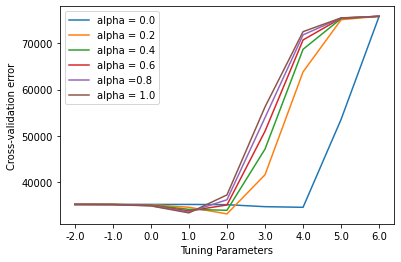

In [ ]:
# for each alpha there are 9 lamdas 
plt.plot(log_tuning, cv_df[:9]["CV_values"], label=f"alpha = {alphas[0]}")
plt.plot(log_tuning, cv_df[9:18]["CV_values"],label=f"alpha = {alphas[1]}")
plt.plot(log_tuning, cv_df[18:27]["CV_values"],label=f"alpha = {alphas[2]}")
plt.plot(log_tuning, cv_df[27:36]["CV_values"],label=f"alpha = {alphas[3]}")
plt.plot(log_tuning, cv_df[36:45]["CV_values"],label=f"alpha ={alphas[4]}")
plt.plot(log_tuning, cv_df[45:54]["CV_values"],label=f"alpha = {alphas[5]}")
plt.xlabel("Tuning Parameters")
plt.ylabel("Cross-validation error")
plt.legend()
plt.show()

In [ ]:
value_list.index(min(value_list))

13

#Minimum CV error is produced at following data

In [ ]:
cv_df[cv_df.index == 30]

,alpha,lambda,CV_values
30,0.6,10.0,33701.55471


# Part 4

In [ ]:
entire_df = pd.read_csv("Credit_N400_p9.csv")

In [ ]:
# Normalizing and Centralizing data
columns = ["Income", "Limit", "Rating", "Cards", "Age", "Education", "Balance"]
from numpy.core.fromnumeric import std
for features in columns:
  mean = entire_df[features].mean()
  std_dev = entire_df[features].std()
  # Centralising the data
  for observations in range(entire_df.shape[0]):  
    entire_df[features][observations] = (entire_df[features][observations] - mean)
    #Standardizing the data
    if features == "Balance":
      pass
    else:
      entire_df[features][observations] = entire_df[features][observations] / std_dev
    # data[features][observations] = "{:.2f}".format(data[features][observations])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Dividing the data into Xf and Yf

Xf = entire_df.loc[:,["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]]
Yf = entire_df.loc[:,["Balance"]]

In [ ]:
# Converting qualitative data in Binary

qual_feature = ["Gender"]
for features in qual_feature:
  for observations in range(Xf.shape[0]):
    if Xf[features][observations] == "Male":  
      Xf[features][observations] = 1
    else:
      Xf[features][observations] = 0

qual_feature = ["Student","Married"]
for features in qual_feature:
  for observations in range(Xf.shape[0]):
    if Xf[features][observations] == "Yes":  
      Xf[features][observations] = 1
    else:
      Xf[features][observations] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Setting

In [ ]:
features = ["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]

For the best lamda (10.0) and best alpha (0.6)

In [ ]:
betas_f = elastic_net2(Xf,Yf, lamda=10.0, alpha=0.6)

Comparison with lasso and ridge

In [ ]:
betas_ridge = elastic_net2(Xf,Yf, lamda=10.0, alpha=1)

In [ ]:
betas_lasso = elastic_net2(Xf,Yf, lamda=10.0, alpha=0)

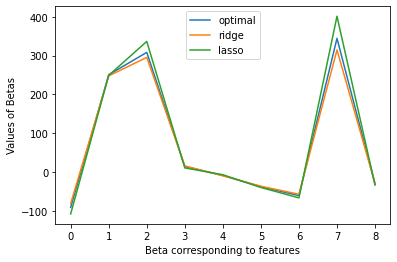

In [ ]:
plt.plot(betas_f, label="optimal")
plt.plot(betas_ridge, label="ridge")
plt.plot(betas_lasso, label="lasso")
plt.xlabel("Beta corresponding to features")
plt.ylabel("Values of Betas")
plt.legend()
plt.show()

In [ ]:
print(f"Optimal betas: {betas_f}\n")
print(f"Ridge Betas: {betas_ridge}\n")
print(f"Lasso Betas: {betas_lasso}\n")
print("As shown by the figure above, the values of optimal betas lie in between of betas produced by lasso and ridge regression.")

Optimal betas: [[-90.90689218]
 [250.54817657]
 [308.14287884]
 [ 14.37527941]
 [ -8.6310788 ]
 [-37.68408046]
 [-60.44513089]
 [344.27551081]
 [-30.77720137]]

Ridge Betas: [[-81.20846761]
 [247.57417937]
 [295.30632338]
 [ 15.99696774]
 [ -9.60403001]
 [-36.34779583]
 [-57.10325169]
 [314.42457142]
 [-29.29933955]]

Lasso Betas: [[-107.67087272]
 [ 248.88054334]
 [ 336.34127189]
 [  10.79614974]
 [  -6.80837218]
 [ -39.63721943]
 [ -66.31820559]
 [ 401.16973359]
 [ -33.43153965]]

As shown by the figure above, the values of optimal betas lie in between of betas produced by lasso and ridge regression.


# Part 6

In [ ]:
df_extra = pd.read_csv("Credit_N400_p9.csv")

In [ ]:
# Dividing the data into Xf and Yf

X_extra = entire_df.loc[:,["Income", "Limit", "Rating", "Cards", "Age", "Education","Gender","Student","Married"]]
Y_extra = entire_df.loc[:,["Balance"]]

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

In [ ]:
# Converting qualitative data in Binary

qual_feature = ["Gender"]
for features in qual_feature:
  for observations in range(X_extra.shape[0]):
    if X_extra[features][observations] == "Male":  
      X_extra[features][observations] = 1
    else:
      X_extra[features][observations] = 0

qual_feature = ["Student","Married"]
for features in qual_feature:
  for observations in range(X_extra.shape[0]):
    if X_extra[features][observations] == "Yes":  
      X_extra[features][observations] = 1
    else:
      X_extra[features][observations] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Setting

In [ ]:
scaler = StandardScaler()
scaler.fit(X_extra)

StandardScaler()

In [ ]:
X_extra.describe()

,Income,Limit,Rating,Cards,Age,Education
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-8.881784e-18,0.050000,0.040000,0.177500,0.007500,-0.062500
std,1.000000e+00,0.699086,0.727822,0.516392,0.627238,0.509158
min,-9.892355e-01,-1.000000,-1.000000,0.000000,-1.000000,-2.000000
25%,-6.869665e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.434142e-01,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.476271e-01,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.012428e+00,3.000000,4.000000,4.000000,2.000000,1.000000


In [ ]:
def Model(lamda, alpha):
  # define model
  model = linear_model.ElasticNet(alpha=lamda, l1_ratio=alpha, max_iter=1000, normalize=True)
  # fit model
  model.fit(Xf,Yf)
  betas = model.coef_
  return betas.tolist()

In [ ]:
per_alpha_list_1=[[Model(lamda=lamda, alpha=alpha) for lamda in tuning_params] for alpha in alphas]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increas

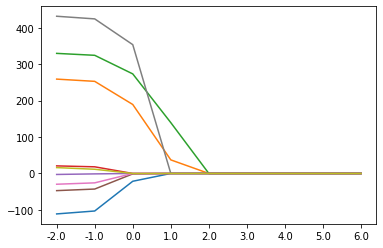

In [ ]:
plt.plot(log_tuning, per_alpha_list_1[5])

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [ ]:
cv_df_extra = pd.DataFrame(columns=['alpha','lambda','CV'])

In [ ]:
for alpha in alphas:
  for lamda in tuning_params:
    model = linear_model.ElasticNet(alpha=lamda, l1_ratio=alpha)
    scores = cross_val_score(model, X_extra, Y_extra,cv=5,scoring='neg_root_mean_squared_error')
    CV_extra = sum(scores)/5
    cv_df_extra.loc[len(cv_df_extra.index)] = [alpha,lamda, CV_extra]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+07, tolerance: 6.872e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+07, tolerance: 6.415e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

In [ ]:
cv_df_extra.head()

,alpha,lambda,CV
0,0.0,0.01,-293.951577
1,0.0,0.10,-303.709205
2,0.0,1.00,-356.829937
3,0.0,10.00,-433.097939
4,0.0,100.00,-457.197366


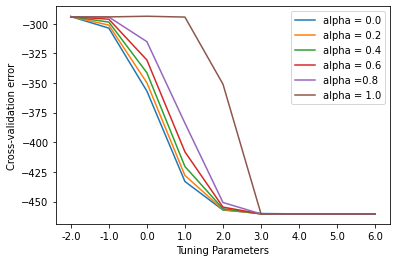

In [ ]:
# for each alpha there are 9 lamdas 
plt.plot(log_tuning, cv_df_extra[:9]["CV"], label=f"alpha = {alphas[0]}")
plt.plot(log_tuning, cv_df_extra[9:18]["CV"],label=f"alpha = {alphas[1]}")
plt.plot(log_tuning, cv_df_extra[18:27]["CV"],label=f"alpha = {alphas[2]}")
plt.plot(log_tuning, cv_df_extra[27:36]["CV"],label=f"alpha = {alphas[3]}")
plt.plot(log_tuning, cv_df_extra[36:45]["CV"],label=f"alpha ={alphas[4]}")
plt.plot(log_tuning, cv_df_extra[45:54]["CV"],label=f"alpha = {alphas[5]}")
plt.xlabel("Tuning Parameters")
plt.ylabel("Cross-validation error")
plt.legend()
plt.show()

In [ ]:
cv_df_extra["CV"].min()

-460.4542798710184

Answers are different because of the epochs was not defined in the sklearn module which could have converge the output more towards the data output from the function made. 
The other reason could be that there could be numerical methods assumptions implemented in the predefined sklearn modules to make it work fast and smooth as the model just took 2 to 3 seconds to run.
And also number of iterations were not set the model for it to be converged towards the minimum.